In [1]:
print('test')

test


In [3]:
pip install -r requirements.txt

Note: you may need to restart the kernel to use updated packages.


In [1]:
from datasets import load_dataset
dataset = load_dataset('aharley/rvl_cdip', trust_remote_code=True, streaming=True)

c:\Users\DanhaeSway\Anaconda3\envs\doc-class\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
for i in dataset['train']:
    print(i)
    break

{'image': <PIL.Image.Image image mode=L size=762x1000 at 0x23AC7157250>, 'label': 11}


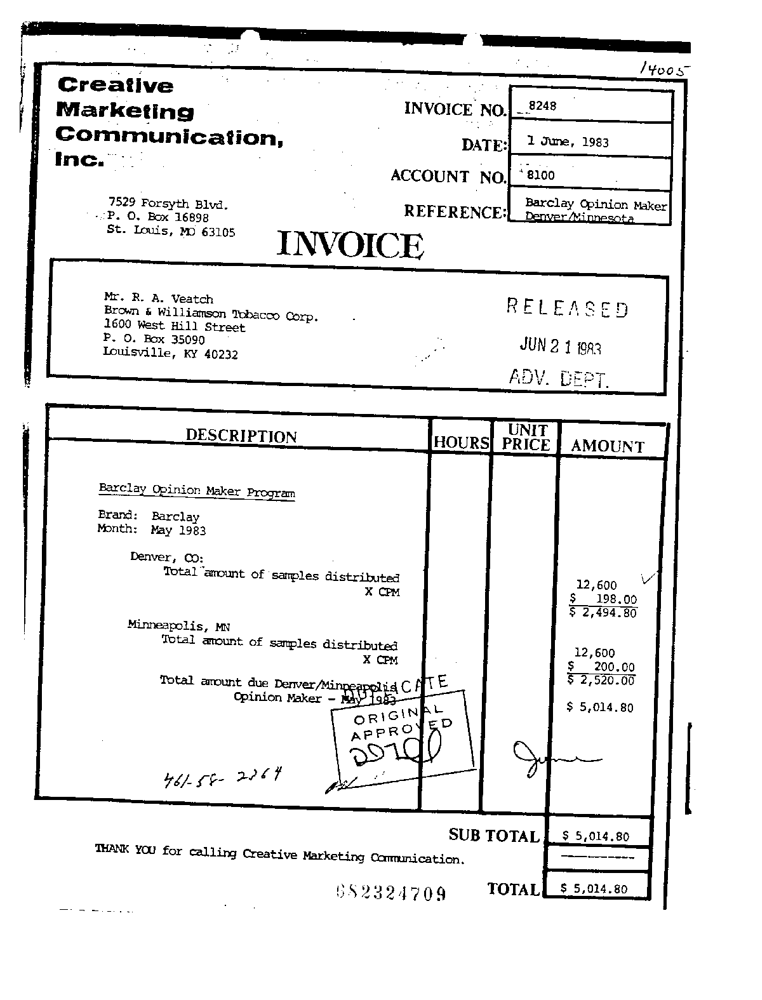

In [4]:
i['image']

In [12]:
# https://pytorch.org/hub/pytorch_vision_inception_v3/
import torch
model = torch.hub.load('pytorch/vision:v0.10.0', 'inception_v3', pretrained=True)
model.eval()

Using cache found in C:\Users\DanhaeSway/.cache\torch\hub\pytorch_vision_v0.10.0


Inception3(
  (Conv2d_1a_3x3): BasicConv2d(
    (conv): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), bias=False)
    (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_2a_3x3): BasicConv2d(
    (conv): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_2b_3x3): BasicConv2d(
    (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (maxpool1): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  (Conv2d_3b_1x1): BasicConv2d(
    (conv): Conv2d(64, 80, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(80, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_4a_3x3): BasicConv2d(
    (conv): Conv2d(80, 192, kernel_size=(3, 3), stri

In [8]:
import urllib
url, filename = ("https://github.com/pytorch/hub/raw/master/images/dog.jpg", "dog.jpg")
urllib.request.urlretrieve(url, filename)

('dog.jpg', <http.client.HTTPMessage at 0x23607ce0310>)

In [13]:

from PIL import Image
from torchvision import transforms
input_image = Image.open(filename)
preprocess = transforms.Compose([
    transforms.Resize(299),
    transforms.CenterCrop(299),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])
input_tensor = preprocess(input_image)
input_batch = input_tensor.unsqueeze(0) # create a mini-batch as expected by the model

# move the input and model to GPU for speed if available
if torch.cuda.is_available():
    input_batch = input_batch.to('cuda')
    model.to('cuda')

with torch.no_grad():
  output = model(input_batch)
# Tensor of shape 1000, with confidence scores over ImageNet's 1000 classes
print(output[0])
# The output has unnormalized scores. To get probabilities, you can run a softmax on it.
probabilities = torch.nn.functional.softmax(output[0], dim=0)
print(probabilities)


tensor([ 1.5641e-01,  1.1133e-01, -4.4415e-01, -6.1848e-02, -2.0080e-01,
         1.6729e-01,  5.8168e-01,  6.2631e-02, -7.5086e-02, -1.1172e+00,
        -2.1842e-01, -5.2634e-01, -1.1776e-01,  6.6982e-02,  8.4914e-01,
        -5.2344e-02, -4.7075e-01, -1.6981e-03,  2.7580e-01,  1.7012e-01,
         4.4203e-01, -3.8531e-01,  1.3643e-01, -5.2120e-01,  8.9576e-04,
        -2.3479e-01, -2.3260e-01, -7.5900e-03,  1.7145e-02, -1.2616e-01,
         2.0525e-01, -8.0503e-03,  1.3082e+00, -2.3140e-01,  9.9093e-01,
        -7.7914e-01,  4.9016e-01, -4.2229e-01, -2.6658e-01, -1.5019e-01,
         3.5119e-01, -1.7542e-01,  1.0256e-01,  4.2291e-01, -1.4374e-01,
         1.3176e-02, -4.6618e-01,  3.5937e-01,  1.5208e-01,  2.0324e-01,
        -1.3609e-01,  1.4966e-01,  2.8317e-01, -3.7176e-01,  9.7795e-01,
         7.9497e-01, -7.4076e-01, -7.8339e-02, -9.6218e-02,  1.2085e-01,
        -1.2773e-01,  3.6824e-01, -4.5282e-01, -7.4878e-01, -8.1052e-02,
         2.1697e-01,  2.6963e-01,  1.0092e+00,  4.0

In [19]:
probabilities.shape

torch.Size([1000])